In [1]:
import pandas as pd

In [2]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

C:\Users\uchoa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\uchoa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [5]:
from sklearn.cluster import KMeans

In [6]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [1 1 2 ... 2 1 2]


In [7]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-5.91799474e-02  1.53279638e+00  4.83208521e-01 -1.67541318e-01
  -2.64854643e-01 -3.58419907e-01  2.33580117e-01 -2.10697599e-01
  -2.93243319e-01  8.82595404e-02 -6.49411775e-02  1.14940225e-01
   2.84747129e-01 -1.75499954e-01  1.78879470e-03 -3.32121001e-01
   9.75380334e-01  4.65069385e-01  1.22555853e-01  3.81704513e-02]
 [-5.91799474e-02 -1.05508148e-01  8.95937074e-01  2.23403446e+00
   2.59603172e+00  2.54235311e-01 -3.28057934e-01 -2.01701196e-01
  -5.94742444e-01  8.89809778e-01 -9.49256298e-02 -2.72231455e-01
   1.91733242e-01  4.12208454e-01 -1.33860560e-01 -2.71369344e-01
   4.34381041e-02 -4.69166331e-01 -1.73866538e-01 -8.15468129e-02]
 [ 2.68694627e-02 -4.72196710e-01 -2.75756261e-01 -2.519076

In [8]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,1.532796,0.483209,-0.167541,-0.264855,-0.358420,0.233580,-0.210698,-0.293243,0.088260,-0.064941,0.114940,0.284747,-0.175500,0.001789,-0.332121,0.975380,0.465069,0.122556,0.038170
1,-0.059180,-0.105508,0.895937,2.234034,2.596032,0.254235,-0.328058,-0.201701,-0.594742,0.889810,-0.094926,-0.272231,0.191733,0.412208,-0.133861,-0.271369,0.043438,-0.469166,-0.173867,-0.081547
2,0.026869,-0.472197,-0.275756,-0.251908,-0.270451,0.079065,-0.029351,0.094434,0.174316,-0.149538,0.033580,0.000689,-0.116581,-0.000579,0.017713,0.142496,-0.315579,-0.083569,-0.015162,-0.000981


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000213156980F0>,
      dtype=object)

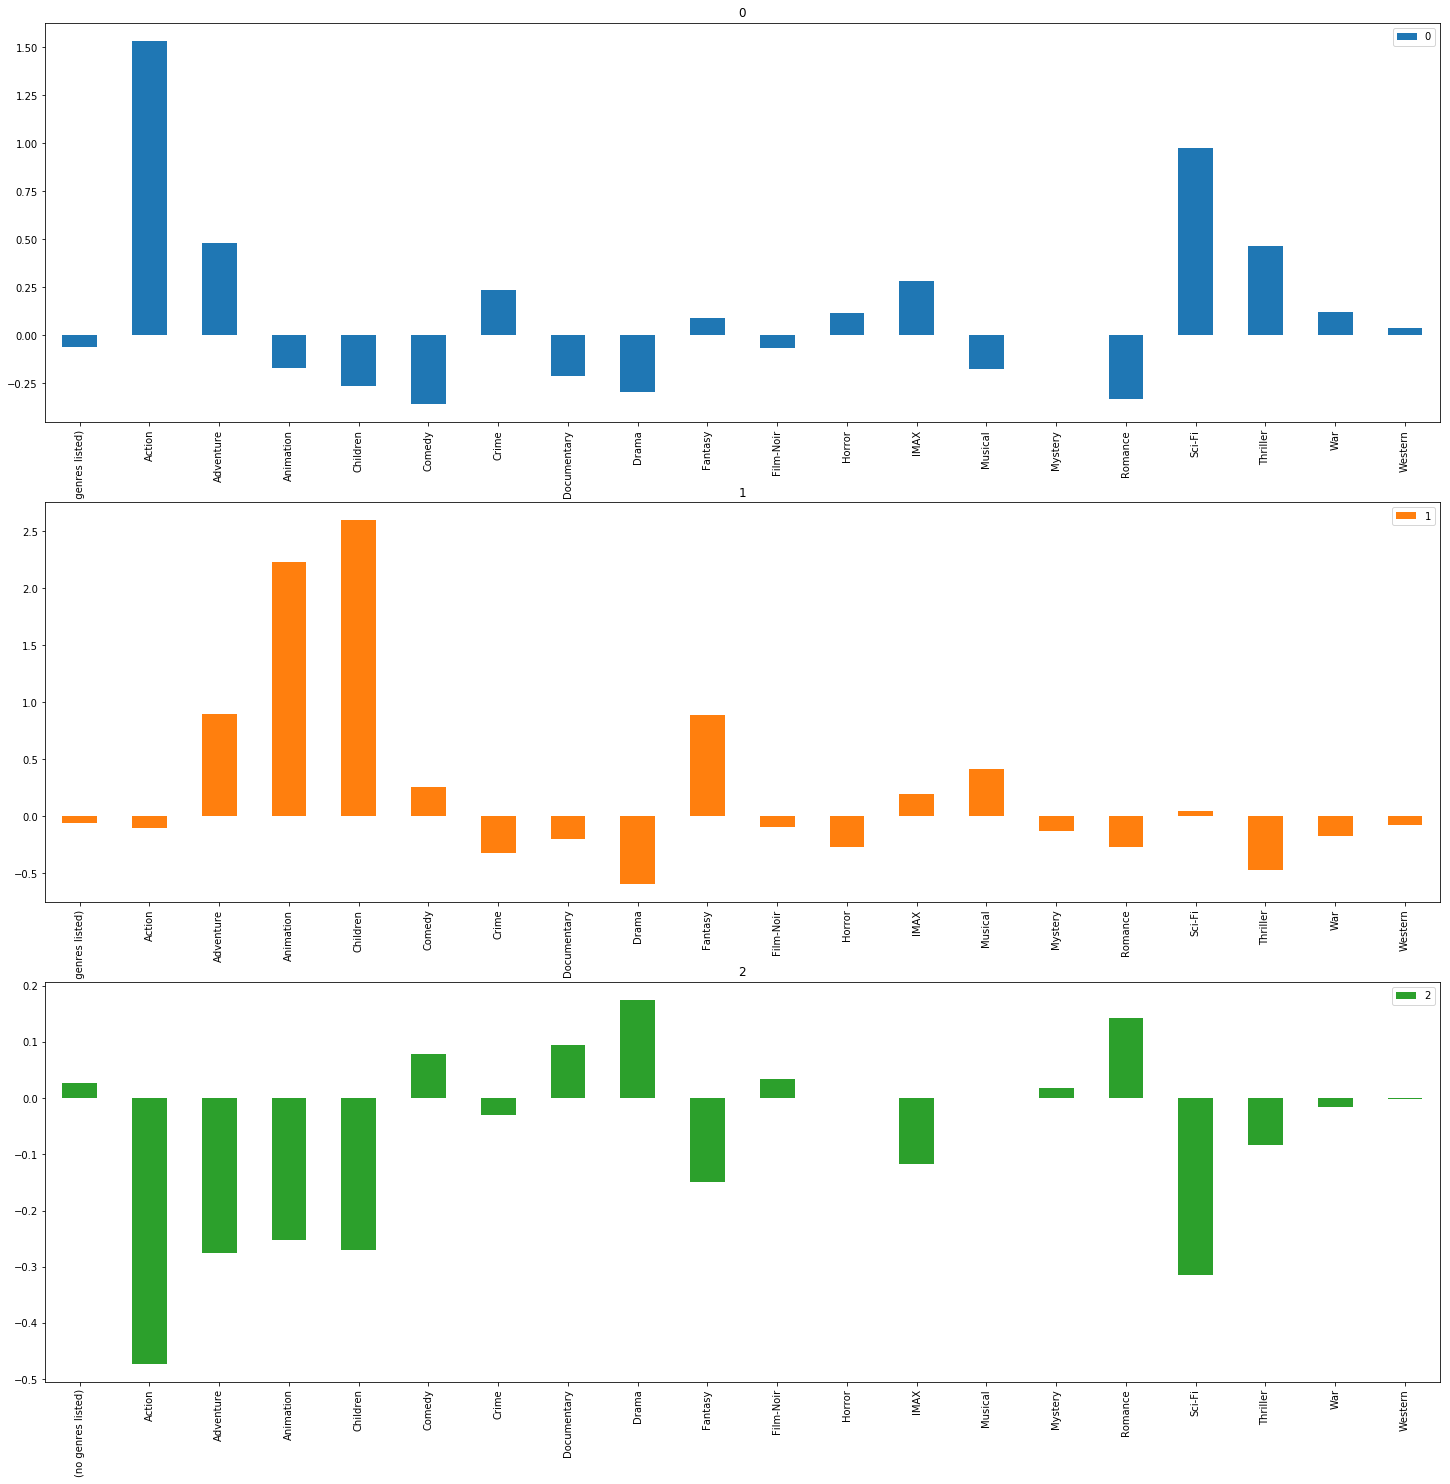

In [10]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

In [11]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8012,97742,Alex Cross (2012),Action|Crime|Mystery|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
5539,26614,"Bourne Identity, The (1988)",Action|Adventure|Drama|Mystery|Thriller,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5459,26142,Major Dundee (1965),Adventure|War|Western,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
8564,116529,Stalingrad (2013),Action|Drama|War|IMAX,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3167,4262,Scarface (1983),Action|Crime|Drama,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6422,51255,Hot Fuzz (2007),Action|Comedy|Crime|Mystery,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4948,7458,Troy (2004),Action|Adventure|Drama|War,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1192,1589,Cop Land (1997),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5554,26696,Lionheart (1990),Action,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,107846,MacGyver: Trail to Doomsday (1994),Action|Adventure,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.manifold import TSNE

In [13]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 66.489685,  -9.691405],
       [-48.300144, -18.574593],
       [-25.350058, -13.923545],
       ...,
       [-10.643382,   8.018928],
       [ 28.319983,  26.678135],
       [  7.036538, -29.280243]], dtype=float32)

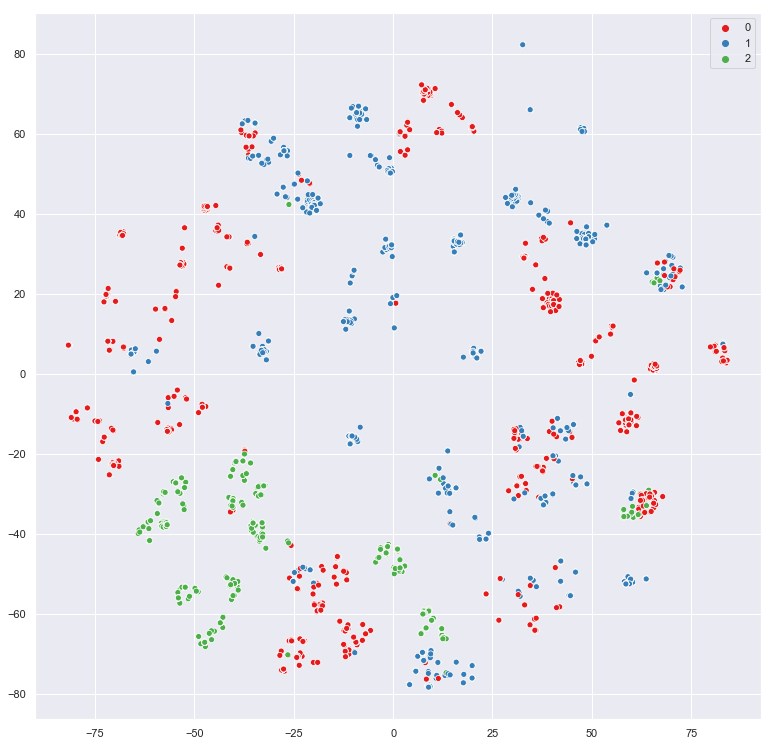

In [41]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002440F026710>,
      dtype=object)

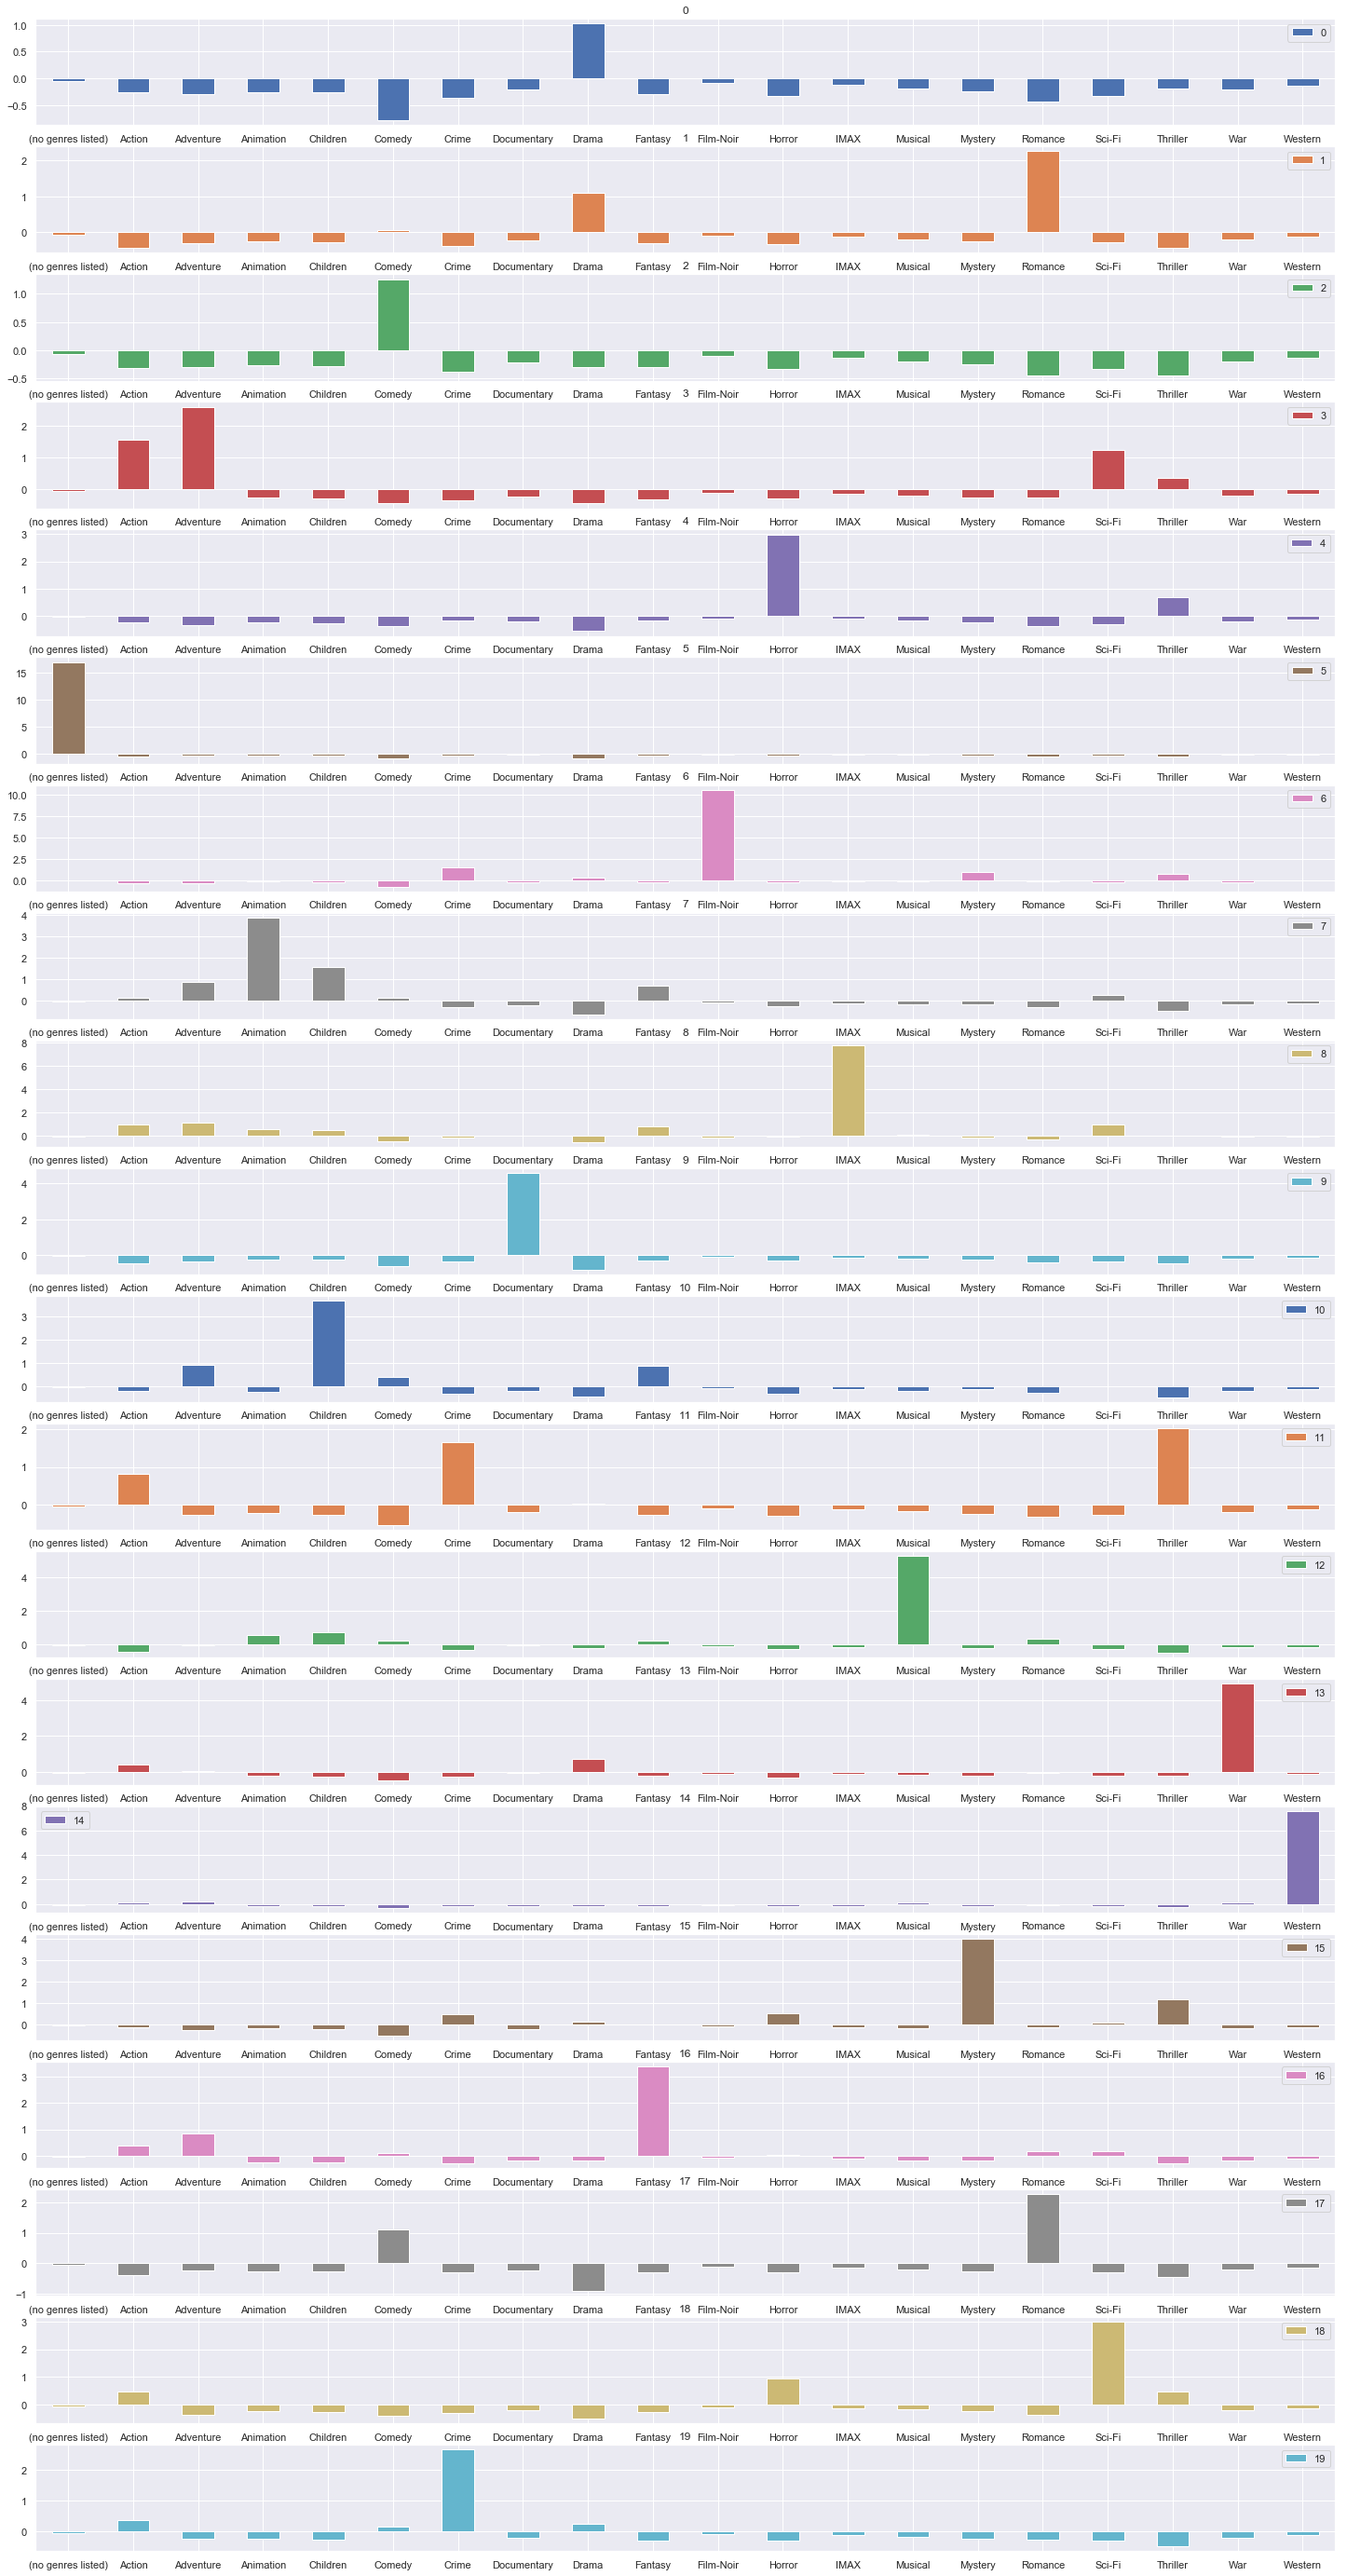

In [42]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [43]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2813,3760,"Kentucky Fried Movie, The (1977)",Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5920,33826,Saint Ralph (2004),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2886,3861,"Replacements, The (2000)",Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3447,4701,Rush Hour 2 (2001),Action|Comedy,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4328,6324,It Runs in the Family (2003),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3425,4663,She's Out of Control (1989),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6775,60126,Get Smart (2008),Action|Comedy,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8227,103984,"Great Beauty, The (Grande Bellezza, La) (2013)",Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4599,6850,Leap of Faith (1992),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [45]:
kmeans(20, generos_escalados)

[20, 55573.09270062232]

In [46]:
kmeans(3, generos_escalados)

[3, 166108.6529526151]

In [47]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.00000000003],
 [2, 179909.5499642514],
 [3, 166263.56920393743],
 [4, 157486.30566560815],
 [5, 148295.94571637272],
 [6, 138124.77590349672],
 [7, 129616.32153264852],
 [8, 118996.28726039412],
 [9, 109944.08478315688],
 [10, 103105.95139171855],
 [11, 95663.17449040481],
 [12, 87573.03191542078],
 [13, 81885.18524949407],
 [14, 75825.1960836245],
 [15, 68285.8653608676],
 [16, 63755.18330193071],
 [17, 61849.69415781499],
 [18, 59567.55359792795],
 [19, 56628.573474803794],
 [20, 54939.908703568566],
 [21, 53528.80909081042],
 [22, 52788.22103010859],
 [23, 50900.26559653707],
 [24, 49705.19013703429],
 [25, 48932.18809602888],
 [26, 46356.6826578213],
 [27, 46017.22891668221],
 [28, 44442.17668420329],
 [29, 44040.853626470576],
 [30, 42848.268067782024],
 [31, 41485.47109765161],
 [32, 40440.500002594],
 [33, 40517.25426624563],
 [34, 39078.07607467723],
 [35, 38240.118120956264],
 [36, 38337.92300480792],
 [37, 36905.151549396745],
 [38, 37022.45027409204],
 [39, 35940

In [48]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179909.549964
2,3,166263.569204
3,4,157486.305666
4,5,148295.945716
5,6,138124.775903
6,7,129616.321533
7,8,118996.287260
8,9,109944.084783
9,10,103105.951392


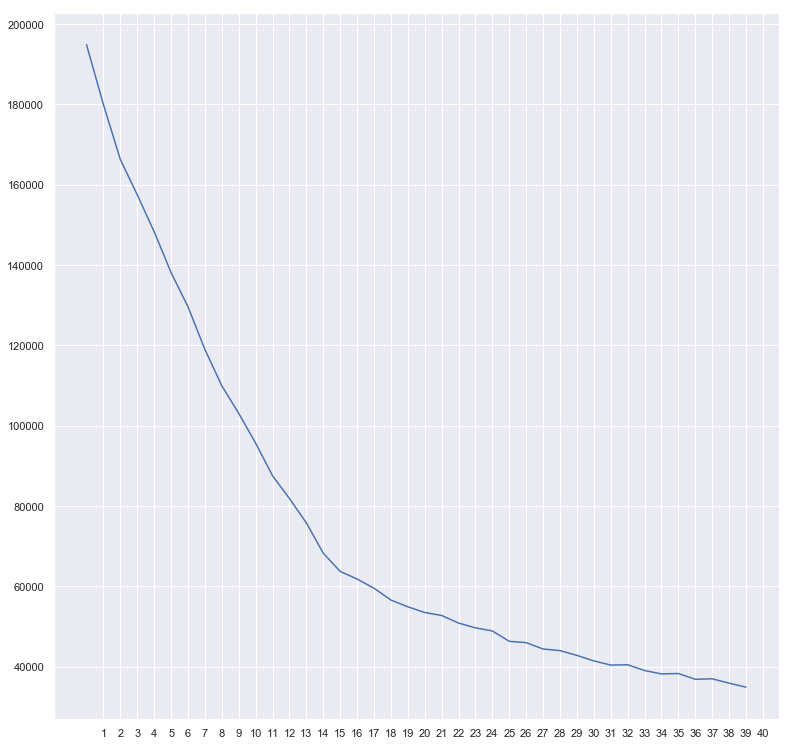

In [49]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002441099EDA0>,
      dtype=object)

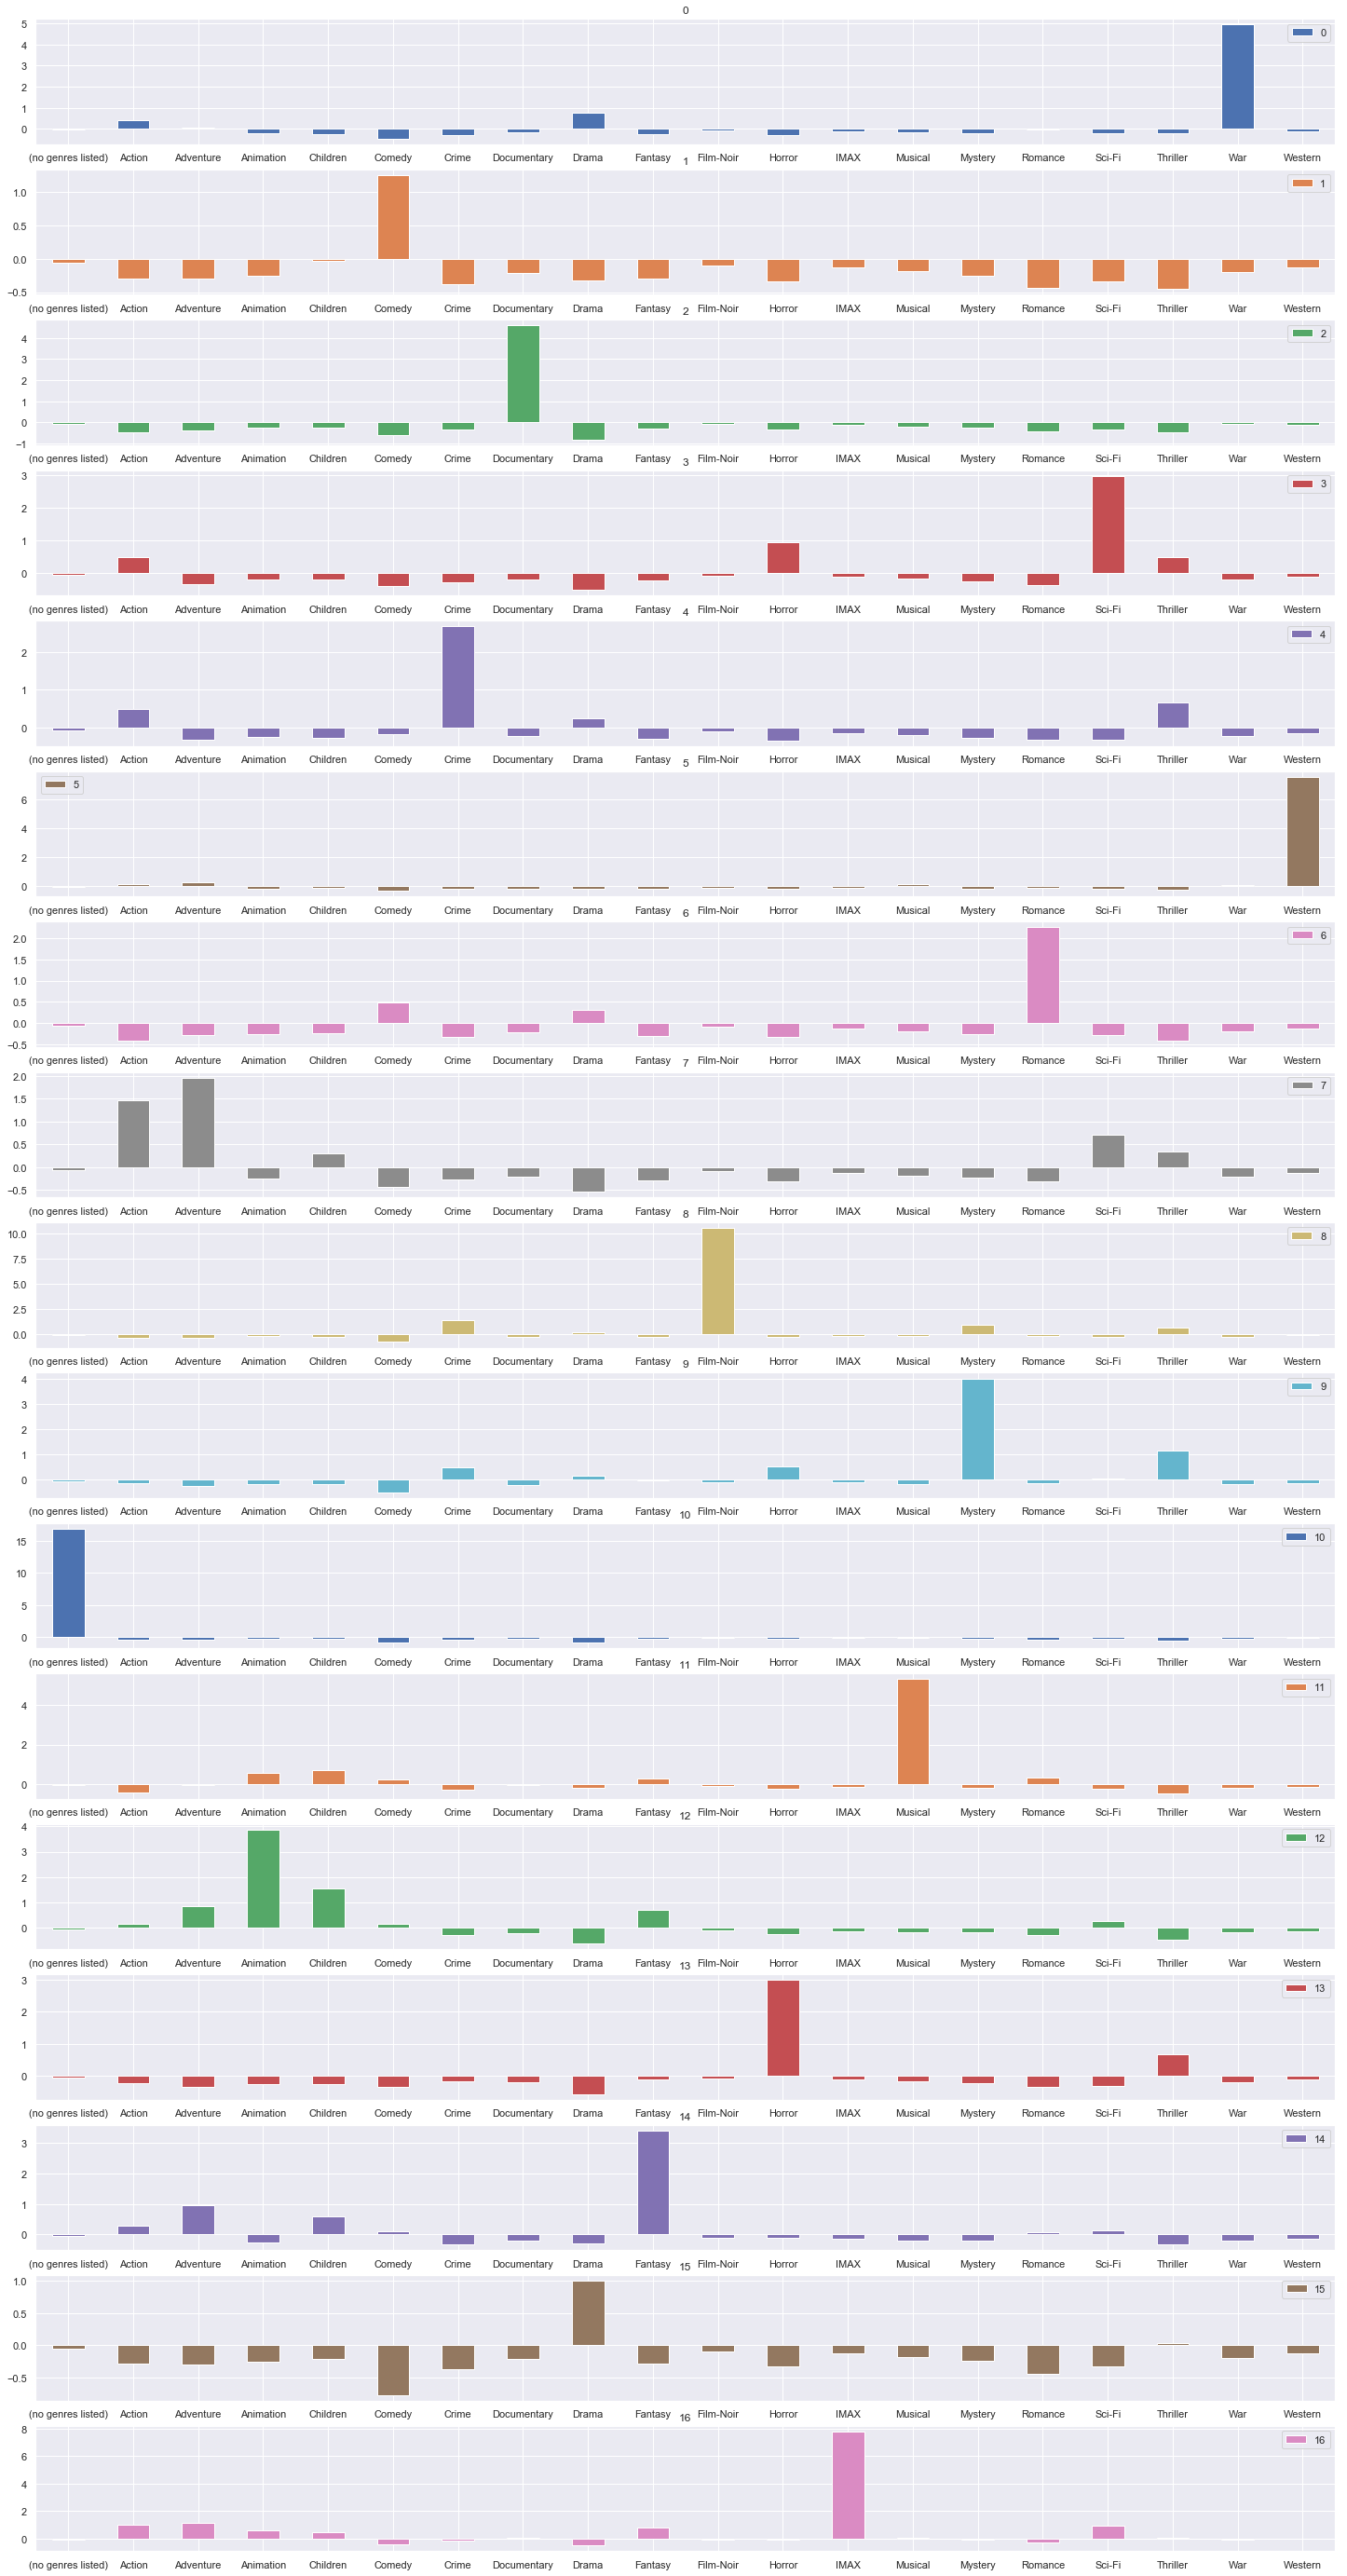

In [50]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [51]:
grupo = 16

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7278,74789,Alice in Wonderland (2010),Adventure|Fantasy|IMAX,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6062,40815,Harry Potter and the Goblet of Fire (2005),Adventure|Fantasy|Thriller|IMAX,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7078,69844,Harry Potter and the Half-Blood Prince (2009),Adventure|Fantasy|Mystery|Romance|IMAX,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
2381,3159,Fantasia 2000 (1999),Animation|Children|Musical|IMAX,0,0,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0
8091,100163,Hansel & Gretel: Witch Hunters (2013),Action|Fantasy|Horror|IMAX,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
5260,8636,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8396,110127,Noah (2014),Adventure|Drama|IMAX,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7599,86644,"Fast Five (Fast and the Furious 5, The) (2011)",Action|Crime|Drama|Thriller|IMAX,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3293,4453,Michael Jordan to the Max (2000),Documentary|IMAX,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8426,111364,Godzilla (2014),Action|Adventure|Sci-Fi|IMAX,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [52]:
from sklearn.cluster import AgglomerativeClustering

In [53]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3], dtype=int64)

In [54]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 69.84469  ,   3.5167155],
       [ 39.667755 , -34.359417 ],
       [-35.252842 ,  16.573395 ],
       ...,
       [-13.322481 ,   2.9704747],
       [-34.68309  ,  -6.063089 ],
       [ 25.003834 ,  10.289806 ]], dtype=float32)

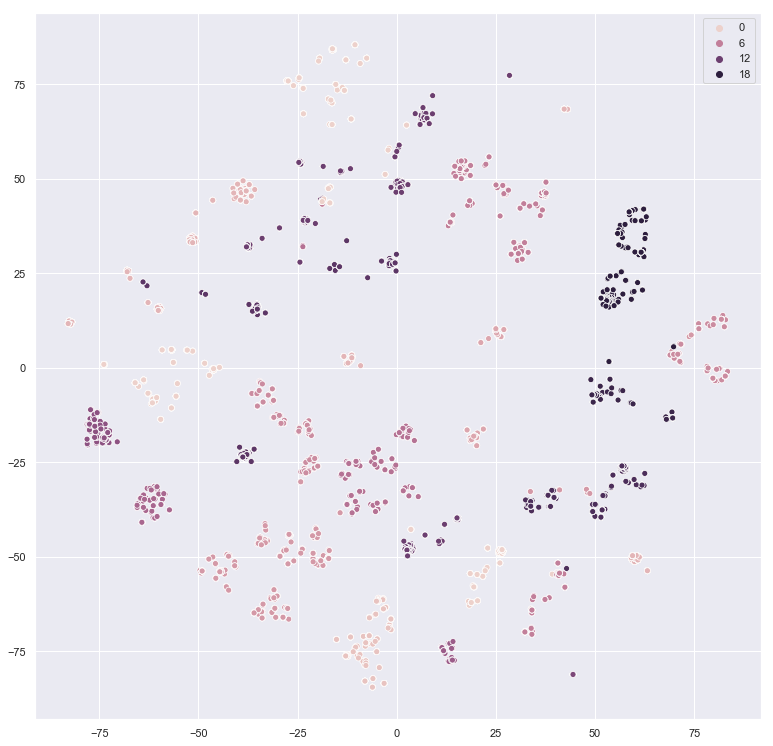

In [55]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000244138189B0>,
      dtype=object)

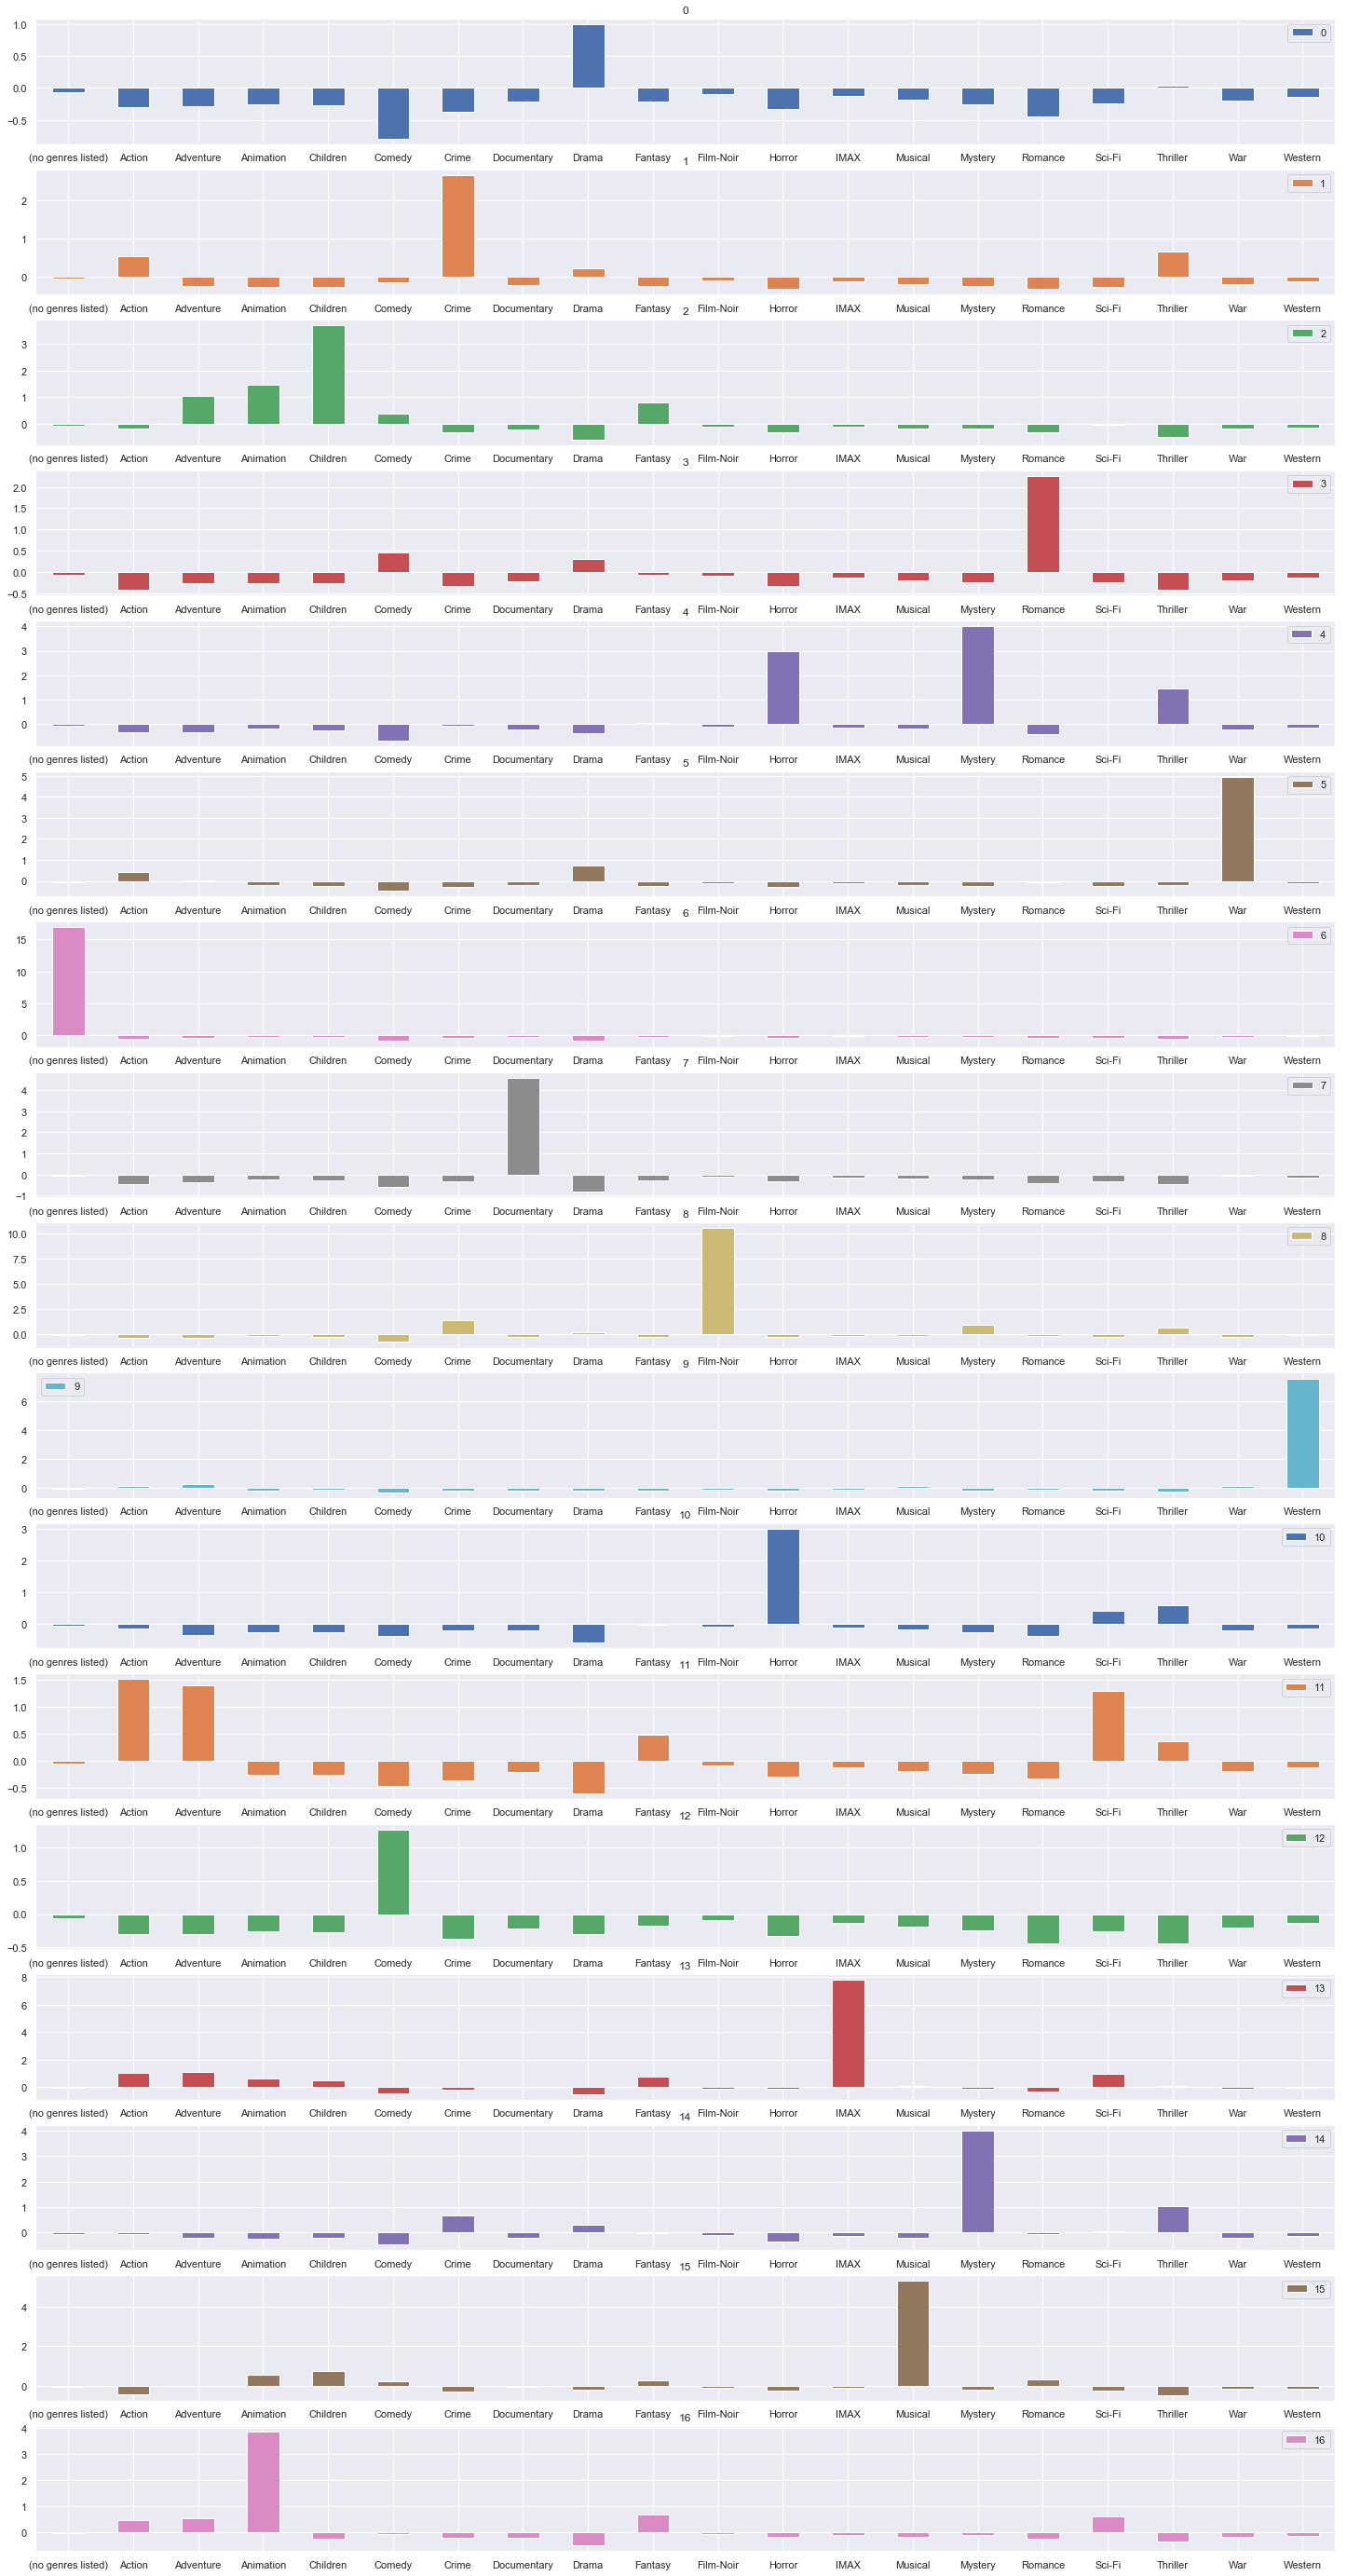

In [57]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [58]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 0.        , 12.        ,  2.47641304,  2.        ],
       [ 3.        , 17.        ,  2.88642796,  3.        ],
       [ 1.        , 18.        ,  3.37078214,  4.        ],
       [11.        , 19.        ,  3.41485016,  5.        ],
       [ 4.        , 14.        ,  3.52936536,  2.        ],
       [10.        , 20.        ,  3.82266035,  6.        ],
       [21.        , 22.        ,  4.38273916,  8.        ],
       [16.        , 23.        ,  4.49004351,  9.        ],
       [ 2.        , 24.        ,  4.73917861, 10.        ],
       [ 7.        , 25.        ,  5.17761691, 11.        ],
       [ 5.        , 26.        ,  5.24848418, 12.        ],
       [15.        , 27.        ,  5.81708722, 13.        ],
       [ 9.        , 28.        ,  7.87182206, 14.        ],
       [13.        , 29.        ,  8.05543857, 15.        ],
       [ 8.        , 30.        , 10.8164952 , 16.        ],
       [ 6.        , 31.        , 17.0723362 , 17.        ]])

In [15]:
from sklearn.datasets import make_blobs

In [16]:
dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)

In [17]:
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


In [18]:
import seaborn as sns

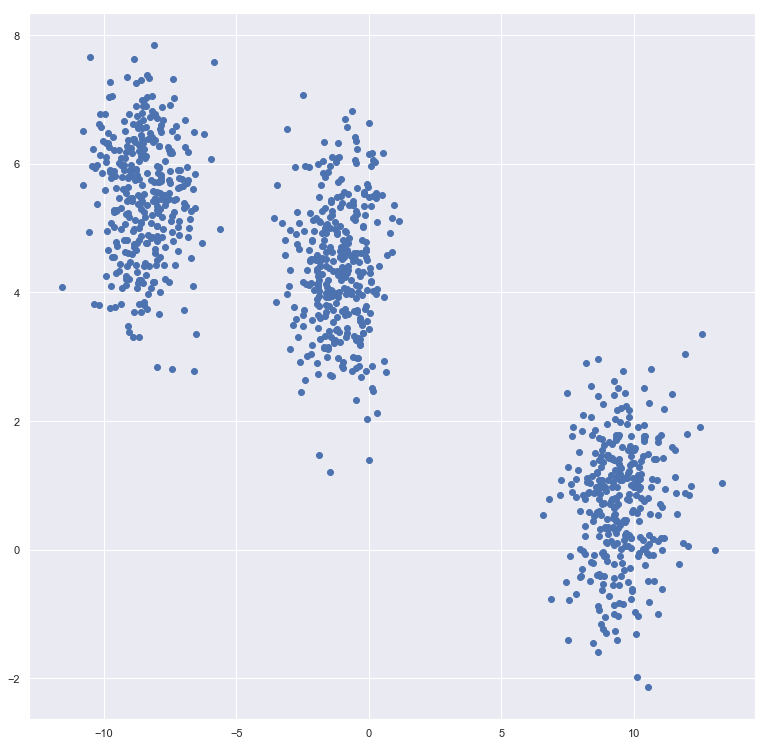

In [19]:
import matplotlib.pyplot as plt

plt.scatter(x=dados.coluna1, y=dados.coluna2)

In [21]:
modelo = KMeans(n_clusters=3)
grupos = modelo.fit_predict(dados)

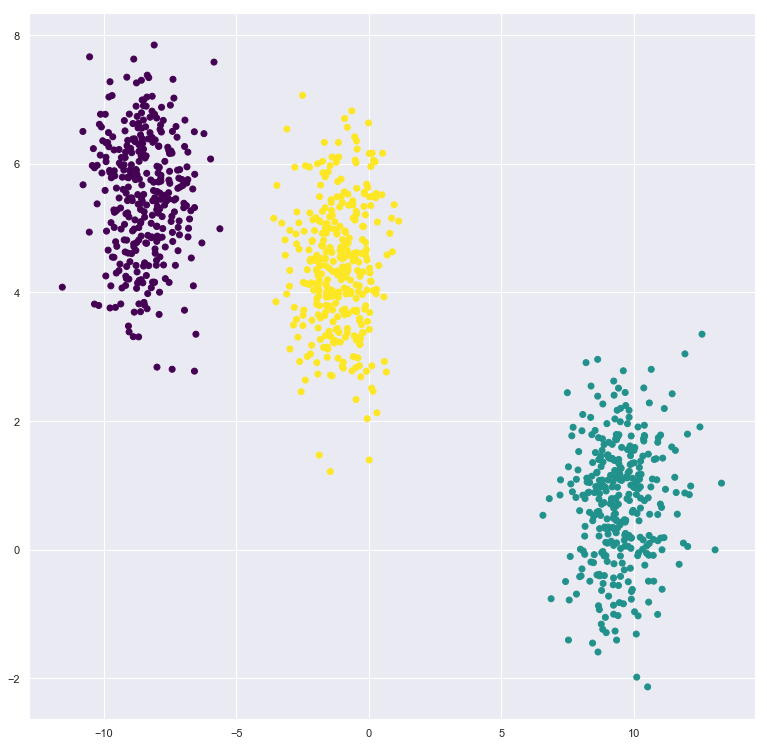

In [22]:
plt.scatter(x=dados.coluna1, y=dados.coluna2, 
            c=grupos,
           cmap='viridis')

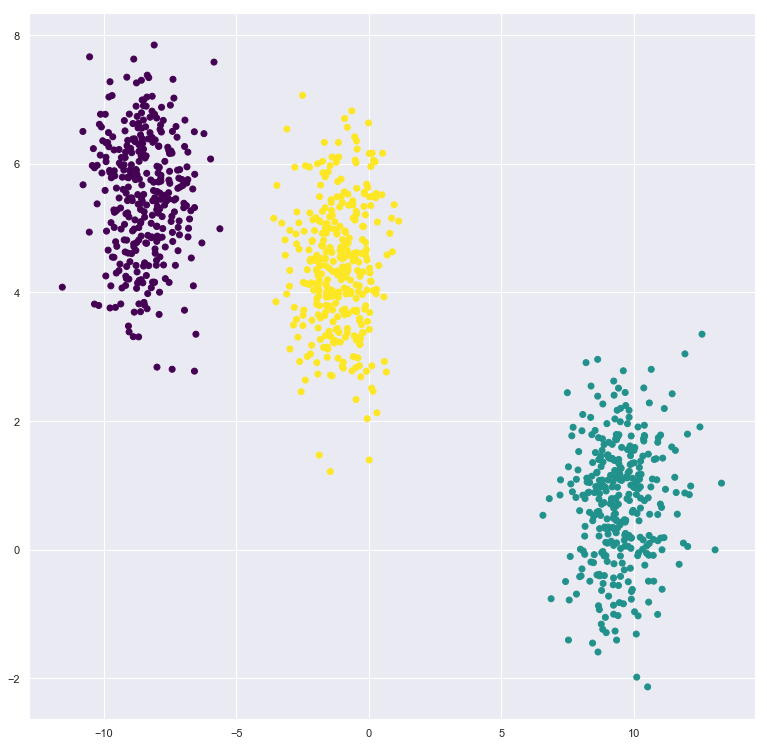

In [23]:
centroides = modelo.cluster_centers_
plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')

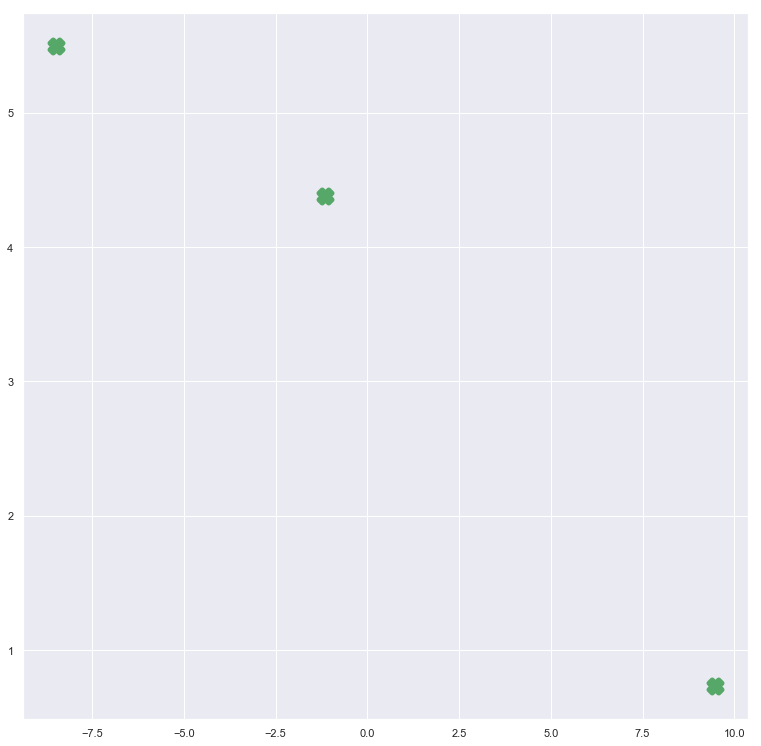

In [25]:
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)